# Predicting Student Success

---
Name : Darryn Johnson

Date : 10/23/2024

Instructor : Mark Barbour

Blog : 

Pace : flexce : FLEX

---
## Sources and Links 

- Github Repository : [predicting_studnet_success](https://github.com/Djohnson1313/predicting_student_success)

- Presentation Link :

- Link to dataset metadata :[dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)

- Original Kaggle Data Set : [Predict Students Dropout and Academic Success](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success)

- `CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

---
# Overview

- title
    - author information
        - author name
        - date last updated
        - instructor
        - blog link
        - student pace
- sources and links
- imports
- business understanding
- data understanding
- data distribution
- data preparation
- methodoligy
- functions
- exploritory data analysis
- model preparation
- modeling
- the final model
- conclusion 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
# Business Understanding

The purpose of the follwing notebook is for a school or a scholoship benefactor to be able to identify studnets who potentially may dropout of school and assist those students with ensuring their success. This can be done from the schools perspective by giving the student additional assitance with learning by allocating more resources to the student. Some examples could include tutoring, after school programs, therapy, etc.. From the benefactors perspective they could help students struggling financially or with a home life that doesnt bolster academic success by targeting them and insuring they recieve the proper funds they need to succeed.  

- business objectives
    - predict if a student will graduate or dropout
        - success is classyifing a student correctly a majority of the time
- situation assesment
    - resources available
        - personal individual data
- data mining goals
    - assess and understand the data provided
- project plan
    - produce a usable and reliable prediction model given the accessable information  

---
# Data Understanding 

The data we have here is a dataset from [Kaggle](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success). This data was collected with the intention of predicting the success of a student based on important demographic, academic, and socio-economic factors, which are crucial for predicting a student's academic outcome.

The data is as follows : 

- data properties
    - the original data set contains 4424 entries, with each entry being an anonymized student
    - the original data set contains 37 columns.
        - a breakdown of these columns is available in [dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)
     
Let's take a look into the data we have.

In [2]:
df = pd.read_csv('predict_student_success_data.csv', sep = ";")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

---
# Data Distribution

Here we will look into the distribution of our data. we can see that a majority of our targets are graduates, with dropouts trailing not far behined. More then likely, enrolled will not be used in the modeling process as this model will not be predicting that.

<div>
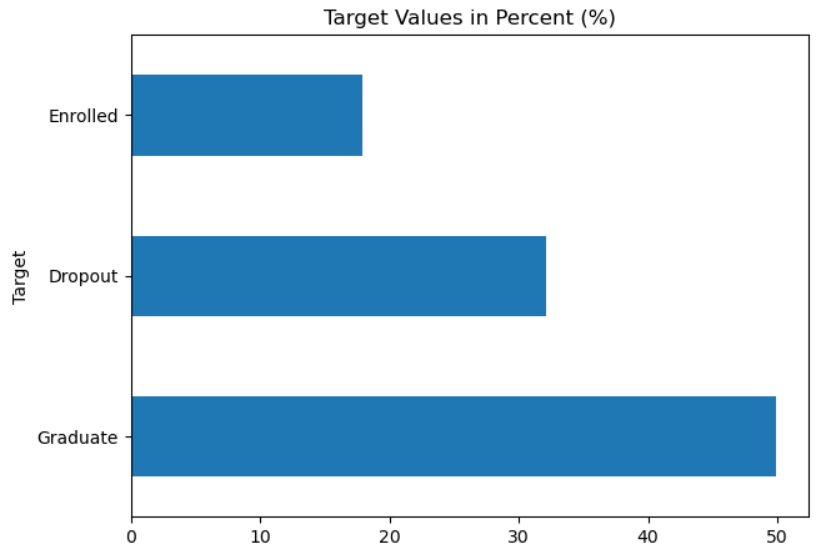
</div>

---
# Data Preparation

In [7]:
df = df.rename(columns = {'Nacionality' : 'Nationality'})

---
## Methodoligy

A common methodology used when attempting to create a model is `CRISP-DM`, which stands for:

- `CR`oss
- `I`dustry
- `S`tandard
- `p`rocess
- (for)
- `D`ata
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<div>
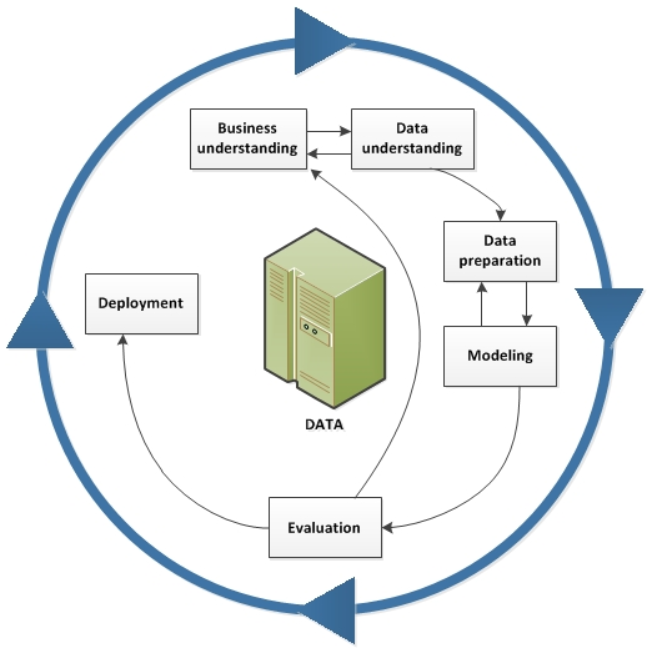
</div>

This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process.

---
# Functions

Here we create some handmade functions to assist with repetitive code blocks. If a code block / section uses a handmade function, there will be a note indicating which one and its purpose.

---
# Exploritory Data Analysis (EDA)

Lets dive more into the data we have, and se if we can get a base understanding of what we're working with. This step assists us with the modeling phase, as it allows us to have a deeper understanding of what the results may look like.

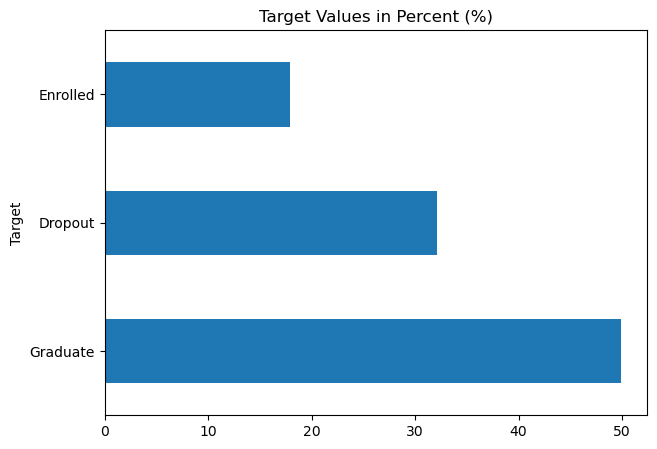

In [6]:
fig, ax = plt.subplots(figsize = (7,5))
target_bar = df['Target'].value_counts(normalize = True) * 100
target_bar.plot(kind = 'barh')
ax.set_title('Target Values in Percent (%)')
plt.show();

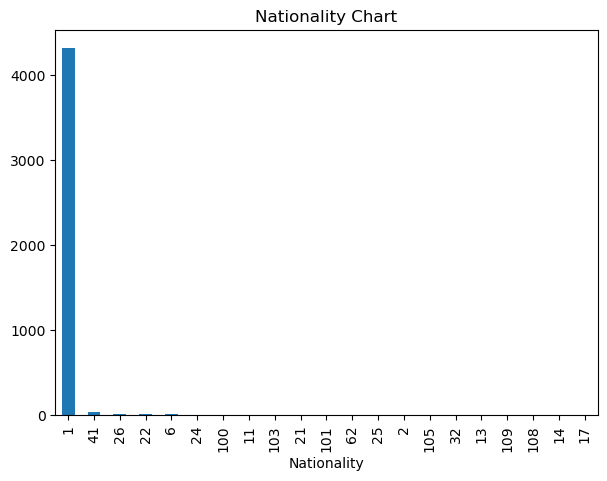

In [8]:
fig, ax = plt.subplots(figsize = (7,5))
nat_bar = df['Nationality'].value_counts()
nat_bar.plot(kind = 'bar')
ax.set_title('Nationality Chart')
plt.show();

In [9]:
df['Nationality'].value_counts()

Nationality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64

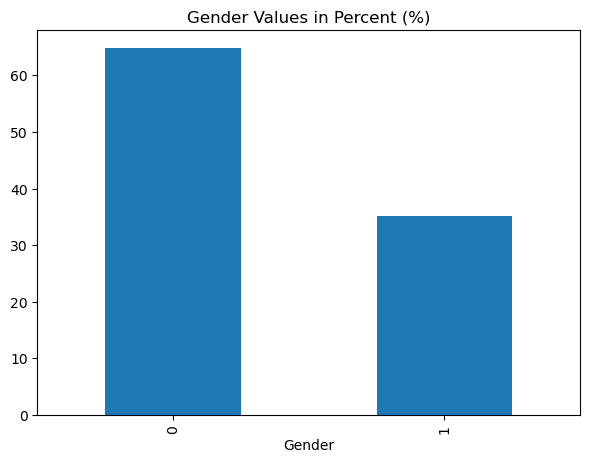

In [10]:
fig, ax = plt.subplots(figsize = (7,5))
gender_bar = df['Gender'].value_counts(normalize = True) * 100
gender_bar.plot(kind = 'bar')
ax.set_title('Gender Values in Percent (%)')
plt.show();

---
# Model Preparation

---
# Modeling

---
# The final Model

---
# Conclusion